<a href="https://colab.research.google.com/github/Abvgdegz02/Python/blob/main/RPS_Tournament.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

1. Опишем поведение агента, всегда играющего "камень" - это значение 0

In [16]:
%%writefile rock_agent.py

# 1. Всегда возвращает камень
def rock_agent(observation, configuration):
    return 0

Overwriting rock_agent.py


2. Опишем поведение агента, всегда играющего "бумагу" - это значение 1

In [ ]:
%%writefile paper_agent.py

# 2. Всегда возвращает бумагу
def paper_agent(observation, configuration):
    return 1

Writing paper_agent.py


3. Опишем поведение агента, всегда играющего "ножницы" - это значение 2

In [ ]:
%%writefile scissors_agent.py

# 3. Всегда возвращает ножницы
def scissors_agent(observation, configuration):
    return 2

Writing scissors_agent.py


4. Опишем поведение агента, который копирует ход опонента или ходит случайно

In [ ]:
%%writefile copy_opponent_agent.py
import random

# 4. Копирует ход опонента или ходит случайно
def copy_opponent_agent(observation, configuration):
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        return random.randrange(0, configuration.signs)

Writing copy_opponent_agent.py


5. Опишем поведение агента, который возвращает случаное значение

In [ ]:
%%writefile random_agent.py
import random

# 5. Возвращает случаное значение
def random_agent(observation, configuration):
    return random.randrange(0, configuration.signs)

Writing random_agent.py


6. Опишем поведение агента, который возвращает камень и ножницы по нечетным ходам и бумагу по четным

In [ ]:
%%writefile even_odd_agent.py
import random

# 6. Возвращает камень и ножницы по нечетным ходам и бумагу по четным
def even_odd_agent(observation, configuration):
    if observation.step % 2 != 0:
        return random.randrange(0, 3)
    else:
        return 1

Writing even_odd_agent.py


7. Опишем поведение агента, который возвращает победное значение относительно последнего хода опонента или ходит случайно

In [ ]:
%%writefile counter_win_agent.py
import random

# 7. Возвращает победное значение относительно последнего хода опонента или ходит случайно
def counter_win_agent(observation, configuration):
    if observation.step > 0:
        if observation.lastOpponentAction == 0:
            return 1
        elif observation.lastOpponentAction == 1:
            return 2
        else:
            return 0
    else:
        return random.randrange(0, configuration.signs)

Writing counter_win_agent.py


8. Опишем поведение агента, который возвращает проигрышное значение относительно последнего хода опонента или ходит случайно

In [ ]:
%%writefile counter_lose_agent.py
import random

# 8. Возвращает проигрышное значение относительно последнего хода опонента или ходит случайно
def counter_lose_agent(observation, configuration):
    if observation.step > 0:
        if observation.lastOpponentAction == 0:
            return 2
        elif observation.lastOpponentAction == 1:
            return 0
        else:
            return 1
    else:
        return random.randrange(0, configuration.signs)

Writing counter_lose_agent.py


9. Опишем поведение агента, который ходит циклично

In [ ]:
%%writefile cycle_agent.py

# 9. Ходит циклично
def cycle_agent(observation, configuration):
    return observation.step % 3

Writing cycle_agent.py


10. Опишем поведение агента, который возвращает решение основываясь на статистике

In [ ]:
%%writefile statistic_agent.py
import random
# Объявляем список, в который будем записывать ходы оппонента
last_moves = []
# 10. Возвращает решение основываясь на статистике
def statistic_agent(observation, configuration):
    # Обнуляем список ходов при каждой новой игре
    if observation.step == 0:
        # Объявляем переменную глобальной, чтобы с ней можно было взаимодействовать
        global last_moves
        last_moves = []
    if observation.step > 0:
        last_moves.append(observation.lastOpponentAction)
        if last_moves.count(0) > last_moves.count(1) and last_moves.count(0) > last_moves.count(2):
            return 1
        elif last_moves.count(1) > last_moves.count(0) and last_moves.count(1) > last_moves.count(2):
            return 2
        else:
            return 0
    else:
        return random.randrange(0, configuration.signs)

Writing statistic_agent.py


11. Опишем поведение агента, который возвращает случайное решение, но у каждого элемента есть вес

In [ ]:
%%writefile weighted_random_agent.py
import random

# 11. Возвращает случайное решение, но у каждого элемента есть вес
def weighted_random_agent(observation, configuration):
    weights = [0.5, 0.3, 0.2]
    return random.choices([0, 1, 2], weights=weights)[0]

Writing weighted_random_agent.py


12. Опишем поведение агента, который возвращает решение, изменяя вес элемента, в зависимости от хода оппонента

In [ ]:
%%writefile adaptive_weighted_agent.py
import random

# 12. Возвращает решение, изменяя вес элемента, в зависимости от хода оппонента
def adaptive_weighted_agent(observation, configuration):
    if observation.step == 0:
        return random.randint(0, 2)
    # Инициализация весов, если они еще не установлены
    if not hasattr(adaptive_weighted_agent, "weights"):
        adaptive_weighted_agent.weights = [0.33, 0.33, 0.34]

    last_action = observation.lastOpponentAction
    # Изменяет вес элемента, в зависимости от предыдущего хода оппонента
    if last_action == 0:
        adaptive_weighted_agent.weights[1] += 0.05
        adaptive_weighted_agent.weights[2] -= 0.05
    elif last_action == 1:
        adaptive_weighted_agent.weights[2] += 0.05
        adaptive_weighted_agent.weights[0] -= 0.05
    else:
        adaptive_weighted_agent.weights[0] += 0.05
        adaptive_weighted_agent.weights[1] -= 0.05

    # Нормализуем веса, чтобы их сумма была равна 1
    total_weight = sum(adaptive_weighted_agent.weights)
    adaptive_weighted_agent.weights = [item / total_weight for item in adaptive_weighted_agent.weights]

    return random.choices([0, 1, 2], weights=adaptive_weighted_agent.weights)[0]

Writing adaptive_weighted_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр

Результаты матча между rock_agent.py и paper_agent.py: [[-99.0, 99.0]]
Результаты матча между rock_agent.py и scissors_agent.py: [[99.0, -99.0]]
Результаты матча между rock_agent.py и copy_opponent_agent.py: [[0, 0]]
Результаты матча между rock_agent.py и random_agent.py: [[0, 0]]
Результаты матча между rock_agent.py и even_odd_agent.py: [[-53.0, 53.0]]
Результаты матча между rock_agent.py и counter_win_agent.py: [[-97.0, 97.0]]
Результаты матча между rock_agent.py и counter_lose_agent.py: [[97.0, -97.0]]
Результаты матча между rock_agent.py и cycle_agent.py: [[0, 0]]
Результаты матча между rock_agent.py и statistic_agent.py: [[-99.0, 99.0]]
Результаты матча между rock_agent.py и weighted_random_agent.py: [[-23.0, 23.0]]
Результаты матча между rock_agent.py и adaptive_weighted_agent.py: [[-64.0, 64.0]]
Результаты матча между paper_agent.py и scissors_agent.py: [[-99.0, 99.0]]
Результаты матча между paper_agent.py и copy_opponent_agent.py: [[0, 0]]
Результаты матча между paper_agent.py 

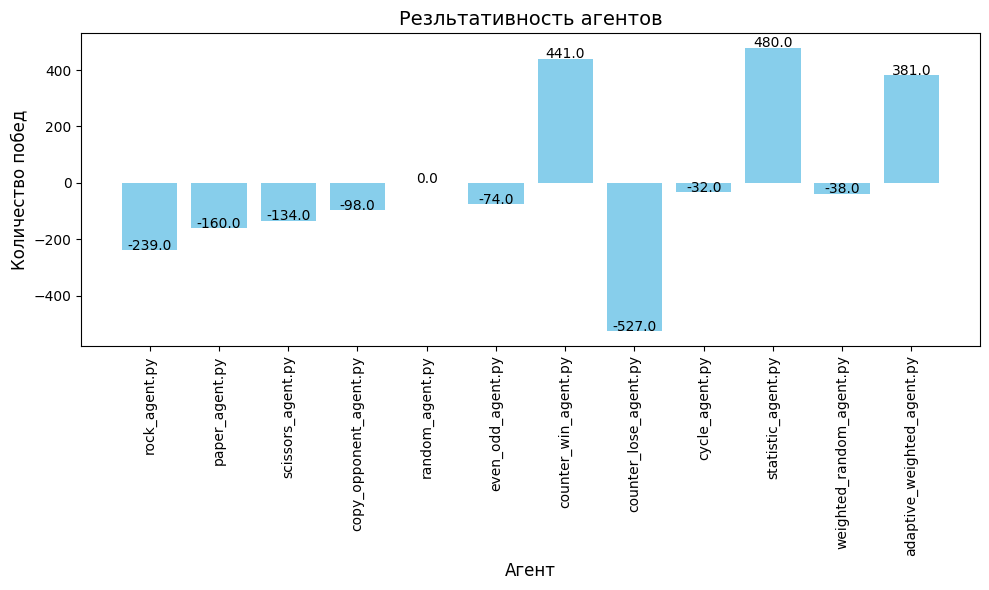

In [ ]:
# Создаем список agent, в который записываем всех агентов
agents = [
    "rock_agent.py",
    "paper_agent.py",
    "scissors_agent.py",
    "copy_opponent_agent.py",
    "random_agent.py",
    "even_odd_agent.py",
    "counter_win_agent.py",
    "counter_lose_agent.py",
    "cycle_agent.py",
    "statistic_agent.py",
    "weighted_random_agent.py",
    "adaptive_weighted_agent.py"
]

# Создаем словарь, в котором будем вести статистику
dictionary = {}
# Итерируем по всем парам агентов
for i in range(len(agents)):
    for j in range(i, len(agents)):
        # Избегаем матчей, где агент играет сам с собой
        if i != j:
            # Результат раунда записывается в переменную result
            result = evaluate(
                "rps",
                [agents[i], agents[j]],
                configuration={"episodeSteps": 100}
            )
            # Если агента нет в словаре, то добавляем его и присваиваем результат
            if agents[i] not in dictionary:
                dictionary[agents[i]] = result[0][0]
            # Если есть, то прибавляем результат к имеющемуся значению
            else:
                dictionary[agents[i]] += result[0][0]

            if agents[j] not in dictionary:
                dictionary[agents[j]] = result[0][1]
            else:
                dictionary[agents[j]] += result[0][1]
            # После каждого раунда выводим результаты матча и его участников
            print(f"Результаты матча между {agents[i]} и {agents[j]}: {result}")

# Разделитель для читаемости вывода
print('\n'*2)

# Выводим статистку каждого агента
for item in dictionary:
    print(f'Статистика агента "{item}" за турнир составляет: {dictionary.get(item)}')

# Разделитель для читаемости вывода
print('\n'*2)

# Находим победителя турнира
maximum = max(dictionary, key = dictionary.get)
maximum_value = dictionary.get(maximum)
print(f'Победителем турнира стал агент "{maximum}", набравший: {maximum_value} очков')

# Разделитель для читаемости вывода
print('\n'*2)

# Создаем график
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем словарь в список и создаем датафрейм
df = pd.DataFrame(list(dictionary.items()), columns=['Агент', 'Победы'])

# Рисуем столбцы
plt.figure(figsize=(10, 6))
plt.bar(df['Агент'], df['Победы'], color='skyblue')

# Создаем подписи
plt.xlabel('Агент', fontsize=12)
plt.ylabel('Количество побед', fontsize=12)
plt.title('Резльтативность агентов', fontsize=14)

for index, value in enumerate(df['Победы']):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Поворачиваем текст
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()